<a href="https://colab.research.google.com/github/apeksha-agase/financial-fraud-detection/blob/main/financial_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('./Fraud.csv')
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0.0,0.0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0.0,0.0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0.0,0.0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0.0,0.0


Checking missing values

In [ ]:
df.isnull().values.any()

True

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

Removing rows containing missing values

In [ ]:
cleandf = df.dropna(axis=0)
cleandf.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Checking Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


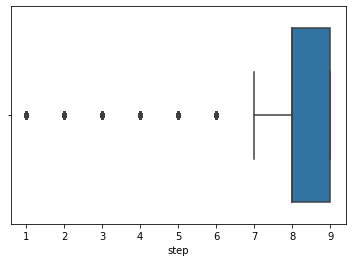

In [ ]:
import seaborn as sns
sns.boxplot(cleandf['step'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


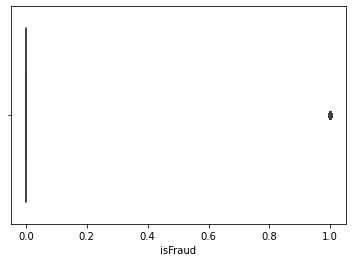

In [ ]:
sns.boxplot(cleandf['isFraud'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


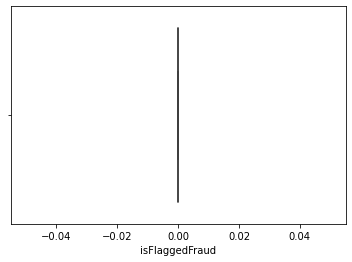

In [ ]:
sns.boxplot(cleandf['isFlaggedFraud'])

checking  multi-collinearity

In [ ]:
corr=cleandf.corr()
corr.style.background_gradient()

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.078138,0.006637,0.006260,0.000887,0.015396,-0.051862,nan
amount,0.078138,1.000000,-0.001700,-0.008403,0.268005,0.389110,0.047712,nan
oldbalanceOrg,0.006637,-0.001700,1.000000,0.998970,0.108261,0.075372,-0.004517,nan
newbalanceOrig,0.006260,-0.008403,0.998970,1.000000,0.110350,0.074976,-0.012301,nan
oldbalanceDest,0.000887,0.268005,0.108261,0.110350,1.000000,0.930480,-0.010576,nan
newbalanceDest,0.015396,0.389110,0.075372,0.074976,0.930480,1.000000,-0.007152,nan
isFraud,-0.051862,0.047712,-0.004517,-0.012301,-0.010576,-0.007152,1.000000,nan
isFlaggedFraud,nan,nan,nan,nan,nan,nan,nan,nan


Checking what type of transactions are fraud

In [ ]:
set(cleandf.loc[cleandf.isFraud == 1].type.values)

{'CASH_OUT', 'TRANSFER'}

Assembling only data which is usefull. Only considering 'CASH_OUT' and 'TRANSFER' type data. 'nameOrig', 'nameDest', 'isFlaggedFraud' are unrelated to any explanatory vaiable.

In [ ]:
import numpy as np
X = cleandf.loc[(cleandf.type == 'TRANSFER') | (cleandf.type == 'CASH_OUT')]

Y = X['isFraud']

# Eliminating irrelevant columns
X = X.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)

# Binary-encoding of labelled data in 'type'
X.loc[X.type == 'TRANSFER', 'type'] = 0
X.loc[X.type == 'CASH_OUT', 'type'] = 1
X.type = X.type.astype(int) # convert dtype('O') to dtype(int)
X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,0,181.00,181.00,0.0,0.0,0.00,1.0
3,1,1,181.00,181.00,0.0,21182.0,0.00,1.0
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0.0
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0.0
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0.0
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0.0


1) New balance of origin should be less than old balance of origin by amount of transaction.




newbalanceOrig = oldbalanceOrig - amount




errorAtOrig = amount + newbalanceOrig - oldbalanceOrig



2) New Balance of destination should be greater than old balance of destination by amount of transaction.




newbalancedest = oldbalancedest - amount




errorAtdest = amount + newbalancedest - oldbalancedest

In [ ]:
X['errorAtOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorAtDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest
X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorAtOrig,errorAtDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1.0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1.0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0.0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0.0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0.0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0.0,0.00,54744.51




The best result is obtained on the dataset by using a ML algorithm based on ensembles of decision trees that intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used below slightly outperforms random-forest. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class.

In [ ]:
from sklearn.model_selection import train_test_split
del X['isFraud']
randomState = 5
np.random.seed(randomState)
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, \
                                                random_state = randomState)


Since the data is highly skewed, I use the area under the precision-recall curve (AUPRC) as it is more sensitive to differences between algorithms and their parameter settings.

In [ ]:
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
weights = (Y == 0).sum() / (1.0 * (Y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, \
                n_jobs = 4)
probabilities = clf.fit(trainX, trainY).predict_proba(testX)
print('AUPRC = {}'.format(average_precision_score(testY, \
                                              probabilities[:, 1])))

AUPRC = 0.9481834169776517


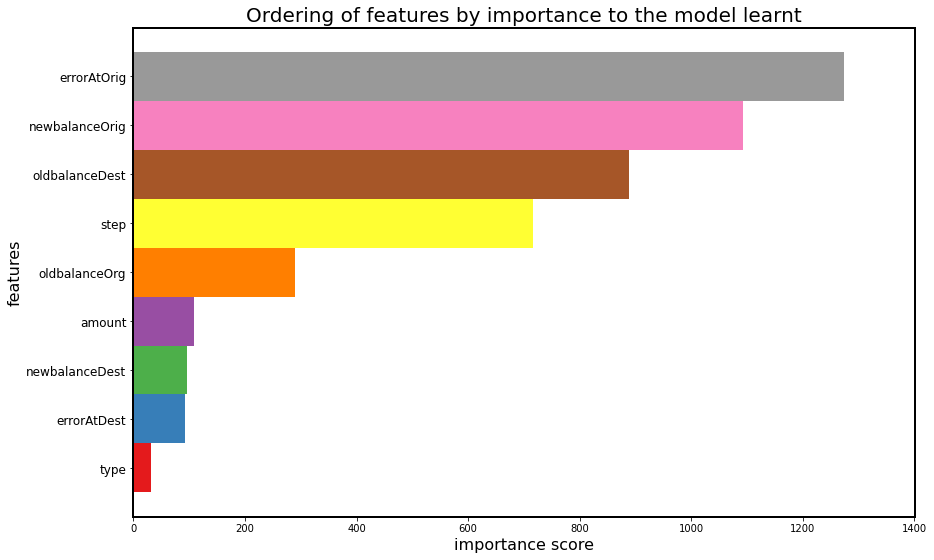

In [ ]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(clf, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20);

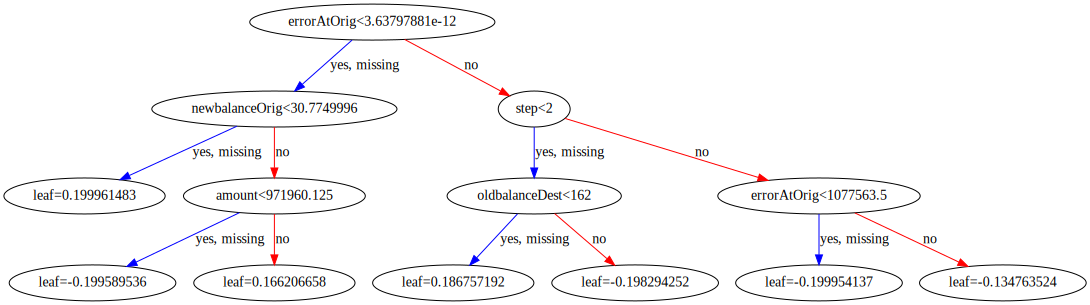

In [ ]:
from xgboost import to_graphviz
to_graphviz(clf)

Performance Analysis using learning curves

In [ ]:

from sklearn.model_selection import learning_curve
trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), trainX,\
                                         trainY, scoring = 'average_precision')

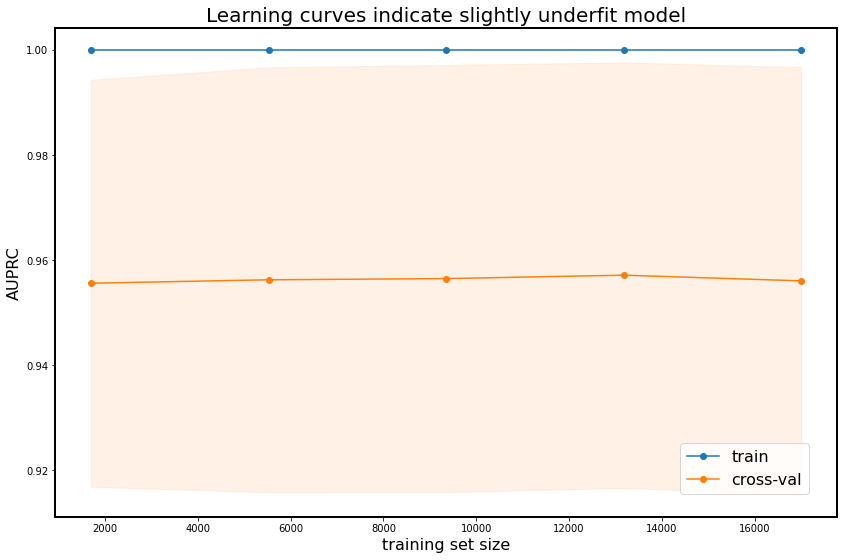

In [ ]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20);

While updating infrastructure, company should take care while cashing out money by customer. Company can build a system to check previous transaction types and amount before customer cashes out money from account. Based on that company can warn customers. Company can inhance security by two-factor authentication. 





If authentication fails, transaction details can be 
logged under alerted zone where necessary actions can be taken soon.